# E-commerce Business Performance Analysis

**Objective:** Comprehensive analysis of e-commerce business performance focusing on revenue trends, product categories, geographic distribution, and customer experience metrics.

**Dataset:** Brazilian e-commerce public dataset containing orders, customers, products, and reviews data from 2022-2023.

---

## Table of Contents

1. [Configuration & Data Loading](#1-configuration--data-loading)
2. [Data Dictionary](#2-data-dictionary) 
3. [Data Preparation & Transformation](#3-data-preparation--transformation)
4. [Revenue Performance Analysis](#4-revenue-performance-analysis)
5. [Product Category Analysis](#5-product-category-analysis)
6. [Geographic Performance Analysis](#6-geographic-performance-analysis)
7. [Customer Experience Analysis](#7-customer-experience-analysis)
8. [Key Insights & Summary](#8-key-insights--summary)

---

## 1. Configuration & Data Loading

Configure analysis parameters and load e-commerce datasets using our custom data loading module.

In [20]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
from data_loader import (
    load_ecommerce_datasets, 
    preprocess_orders_data, 
    create_sales_dataset,
    filter_data_by_date_range,
    add_delivery_metrics,
    get_data_summary
)
from business_metrics import (
    BusinessMetricsCalculator, 
    MetricsVisualizer, 
    print_metrics_summary
)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("Libraries and modules loaded successfully!")

Libraries and modules loaded successfully!


In [21]:
# ANALYSIS CONFIGURATION - Modify these parameters to change analysis scope

# Primary analysis year
ANALYSIS_YEAR = 2023

# Comparison year for growth calculations  
COMPARISON_YEAR = 2022

# Optional: Filter by specific months (set to None to analyze full year)
START_MONTH = None  # 1-12
END_MONTH = None    # 1-12

# Data path
DATA_PATH = 'ecommerce_data'

# Order status filter (usually 'delivered' for revenue analysis)
ORDER_STATUS_FILTER = 'delivered'

print(f"Analysis Configuration:")
print(f"  Primary Analysis Year: {ANALYSIS_YEAR}")
print(f"  Comparison Year: {COMPARISON_YEAR}")
print(f"  Month Range: {START_MONTH or 'All'} to {END_MONTH or 'All'}")
print(f"  Order Status Filter: {ORDER_STATUS_FILTER}")

Analysis Configuration:
  Primary Analysis Year: 2023
  Comparison Year: 2022
  Month Range: All to All
  Order Status Filter: delivered


In [22]:
# Load all e-commerce datasets
datasets = load_ecommerce_datasets(DATA_PATH)

# Extract individual datasets
orders = datasets['orders']
order_items = datasets['order_items']
products = datasets['products']
customers = datasets['customers']
reviews = datasets['reviews']

# Display dataset summary
get_data_summary(datasets)

Loaded orders: (10000, 8)
Loaded order_items: (16047, 7)
Loaded products: (6000, 9)
Loaded customers: (8000, 5)
Loaded reviews: (6571, 7)
=== E-COMMERCE DATASETS SUMMARY ===

ORDERS DATASET:
  Shape: (10000, 8)
  Columns: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
  Date range: 2021-12-31 16:55:08.451178 to 2024-01-01 04:57:29.647794
  Missing values: 927

ORDER_ITEMS DATASET:
  Shape: (16047, 7)
  Columns: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
  Missing values: 0

PRODUCTS DATASET:
  Shape: (6000, 9)
  Columns: ['product_id', 'product_category_name', 'product_name_length', 'product_description_length', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
  Missing values: 0

CUSTOMERS DATASET:
  Shape: (8000, 5)
  Columns:

## 2. Data Dictionary

Understanding the key columns and business terms used in our analysis.

### Key Business Terms

**Revenue Metrics:**
- **Total Revenue:** Sum of all delivered order item prices
- **Average Order Value (AOV):** Average total value per order
- **Month-over-Month Growth:** Percentage change in revenue between consecutive months

**Customer Experience Metrics:**
- **Delivery Days:** Time between order purchase and customer delivery
- **Review Score:** Customer satisfaction rating (1-5 scale)
- **Delivery Speed Categories:** 1-3 days (Fast), 4-7 days (Standard), 8+ days (Slow)

### Dataset Columns

**Orders Dataset:**
- `order_id`: Unique identifier for each order
- `customer_id`: Unique identifier for each customer
- `order_status`: Current status (delivered, shipped, canceled, etc.)
- `order_purchase_timestamp`: When the order was placed
- `order_delivered_customer_date`: When delivered to customer

**Order Items Dataset:**
- `order_id`: Links to orders dataset
- `product_id`: Unique identifier for each product
- `price`: Item price in USD
- `freight_value`: Shipping cost

**Products Dataset:**
- `product_id`: Unique identifier for each product
- `product_category_name`: Product category classification

**Customers Dataset:**
- `customer_id`: Unique identifier for each customer
- `customer_state`: Two-letter state code
- `customer_city`: Customer city

**Reviews Dataset:**
- `order_id`: Links to orders dataset
- `review_score`: Customer rating (1-5)
- `review_creation_date`: When review was created

## 3. Data Preparation & Transformation

Preprocess datasets and create unified sales data for analysis.

In [23]:
# Preprocess orders data (add date components)
orders_processed = preprocess_orders_data(orders)

print("Orders dataset preprocessed:")
print(f"  Date range: {orders_processed['order_purchase_timestamp'].min()} to {orders_processed['order_purchase_timestamp'].max()}")
print(f"  Years available: {sorted(orders_processed['year'].unique())}")
print(f"  Order statuses: {orders_processed['order_status'].unique()}")

Orders dataset preprocessed:
  Date range: 2021-12-31 16:55:08.451178 to 2024-01-01 04:57:29.647794
  Years available: [np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024)]
  Order statuses: ['canceled' 'delivered' 'pending' 'processing' 'shipped' 'returned']


In [24]:
# Create unified sales dataset
sales_data = create_sales_dataset(
    orders=orders_processed, 
    order_items=order_items,
    order_status_filter=ORDER_STATUS_FILTER
)

# Add delivery metrics
sales_data = add_delivery_metrics(sales_data)

print(f"Sales dataset created:")
print(f"  Total records: {len(sales_data):,}")
print(f"  Unique orders: {sales_data['order_id'].nunique():,}")
print(f"  Date range: {sales_data['order_purchase_timestamp'].min()} to {sales_data['order_purchase_timestamp'].max()}")
print(f"\nColumns: {list(sales_data.columns)}")

Sales dataset created:
  Total records: 15,095
  Unique orders: 9,388
  Date range: 2021-12-31 16:55:08.451178 to 2024-01-01 04:12:51.260674

Columns: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_delivered_customer_date', 'year', 'month', 'quarter', 'day_of_week', 'total_item_value', 'delivery_days', 'delivery_speed_category']


In [25]:
# Filter data based on configuration parameters
analysis_data = filter_data_by_date_range(
    df=sales_data,
    start_year=ANALYSIS_YEAR,
    end_year=ANALYSIS_YEAR,
    start_month=START_MONTH,
    end_month=END_MONTH
)

print(f"Filtered dataset for analysis:")
print(f"  Records: {len(analysis_data):,}")
print(f"  Orders: {analysis_data['order_id'].nunique():,}")
print(f"  Total Revenue: ${analysis_data['price'].sum():,.2f}")

# Show sample of processed data
print(f"\nSample of analysis data:")
display(analysis_data.head())

Filtered dataset for analysis:
  Records: 7,448
  Orders: 4,635
  Total Revenue: $3,360,294.74

Sample of analysis data:


,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,year,month,quarter,day_of_week,total_item_value,delivery_days,delivery_speed_category
2,ord_5fa044951857e02fd1347b47,1,prod_9b6f1793388ae983f852d189,sell_34212979d97b6d1a8409a01e,111.91,9.50,cust_2d36e4b647be13c15df550af,delivered,2023-04-24 13:05:32.579655,2023-05-01 02:05:32.579655,2023,4,2,Monday,121.41,6,4-7 days
3,ord_5fa044951857e02fd1347b47,2,prod_c7b5997a4d0061a9f50e874c,sell_4668fb88b81f8d834371c335,878.42,77.50,cust_2d36e4b647be13c15df550af,delivered,2023-04-24 13:05:32.579655,2023-05-01 02:05:32.579655,2023,4,2,Monday,955.92,6,4-7 days
7,ord_43b53981d951f855231d09ec,1,prod_496e129d773e9587e8ddc065,sell_6cfe47a34211c0b92f0fd126,749.83,13.94,cust_e670ce607e4f6aa14935ece0,delivered,2023-12-10 05:13:58.249202,2023-12-19 09:13:58.249202,2023,12,4,Sunday,763.77,9,8+ days
8,ord_e60b1e267fd32d93c4d0745b,1,prod_139fc7c40b163ec81342741e,sell_bcb2c47f4631ff00586f7de0,361.54,54.65,cust_deec5ec61bd39869531896b3,delivered,2023-04-11 05:42:57.214593,2023-04-22 20:42:57.214593,2023,4,2,Tuesday,416.19,11,8+ days
9,ord_e60b1e267fd32d93c4d0745b,2,prod_8668b3ebccd7183bae97138a,sell_bc4ff6f9c9f971b8fc9bf8a3,25.59,2.57,cust_deec5ec61bd39869531896b3,delivered,2023-04-11 05:42:57.214593,2023-04-22 20:42:57.214593,2023,4,2,Tuesday,28.16,11,8+ days


## 4. Revenue Performance Analysis

Analyze revenue trends, growth rates, and order patterns for the configured time period.

In [26]:
# Initialize business metrics calculator
metrics_calc = BusinessMetricsCalculator(sales_data)
visualizer = MetricsVisualizer()

# Calculate revenue metrics
revenue_metrics = metrics_calc.calculate_revenue_metrics(
    current_year=ANALYSIS_YEAR,
    comparison_year=COMPARISON_YEAR
)

# Calculate monthly growth trend
monthly_growth = metrics_calc.calculate_monthly_growth_trend(ANALYSIS_YEAR)

print(f"Revenue Performance Analysis - {ANALYSIS_YEAR}")
print("="*50)
print(f"Total Revenue: ${revenue_metrics['current_revenue']:,.2f}")
print(f"Total Orders: {revenue_metrics['current_orders']:,}")
print(f"Average Order Value: ${revenue_metrics['current_avg_order_value']:.2f}")

if COMPARISON_YEAR:
    print(f"\nYear-over-Year Growth vs {COMPARISON_YEAR}:")
    print(f"  Revenue Growth: {revenue_metrics['revenue_growth_pct']:.2f}%")
    print(f"  Orders Growth: {revenue_metrics['orders_growth_pct']:.2f}%")
    print(f"  AOV Growth: {revenue_metrics['aov_growth_pct']:.2f}%")

print(f"\nMonthly Growth Statistics:")
print(f"  Average Monthly Growth: {monthly_growth.mean():.2f}%")
print(f"  Best Performing Month: {monthly_growth.idxmax()} ({monthly_growth.max():.2f}%)")
print(f"  Worst Performing Month: {monthly_growth.idxmin()} ({monthly_growth.min():.2f}%)")

Revenue Performance Analysis - 2023
Total Revenue: $3,360,294.74
Total Orders: 4,635
Average Order Value: $724.98

Year-over-Year Growth vs 2022:
  Revenue Growth: -2.46%
  Orders Growth: -2.40%
  AOV Growth: -0.06%

Monthly Growth Statistics:
  Average Monthly Growth: -0.39%
  Best Performing Month: 5 (18.74%)
  Worst Performing Month: 10 (-14.45%)


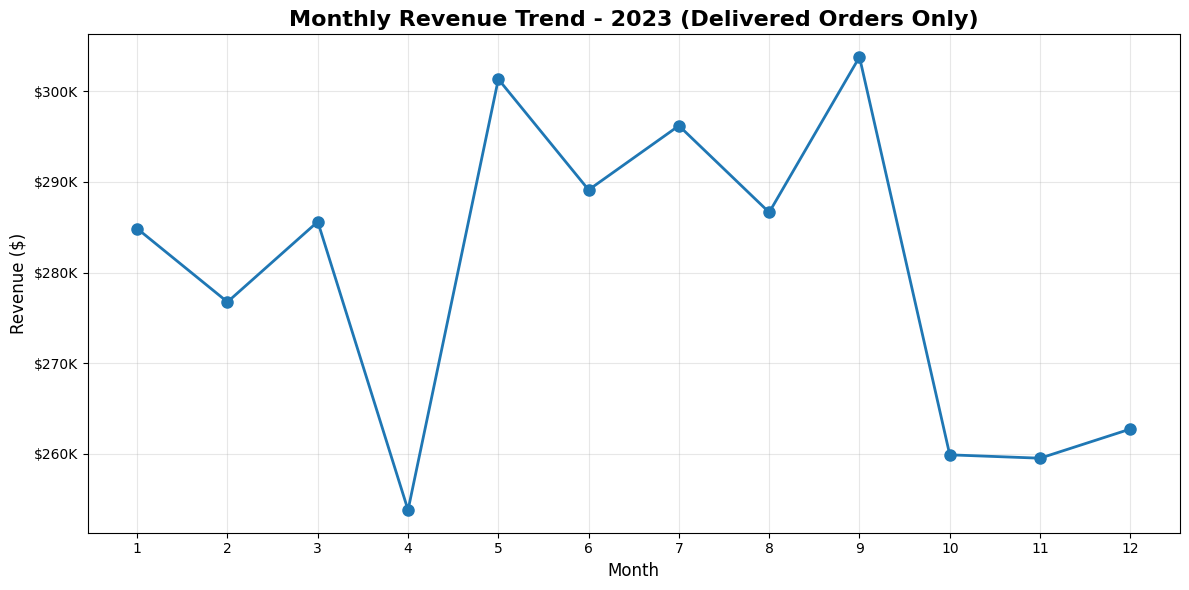

In [27]:
# Create monthly revenue trend visualization
monthly_revenue = analysis_data.groupby('month')['price'].sum().reset_index()

visualizer.plot_monthly_revenue_trend(
    monthly_data=monthly_revenue,
    year=ANALYSIS_YEAR,
    title_suffix="(Delivered Orders Only)"
)

In [28]:
# Display monthly growth rates
monthly_growth_df = pd.DataFrame({
    'Month': monthly_growth.index,
    'Growth_Rate_Pct': monthly_growth.values
}).round(2)

print(f"Month-over-Month Growth Rates - {ANALYSIS_YEAR}:")
display(monthly_growth_df)

Month-over-Month Growth Rates - 2023:


,Month,Growth_Rate_Pct
0,1,NaN
1,2,-2.84
2,3,3.20
3,4,-11.14
4,5,18.74
5,6,-4.06
6,7,2.45
7,8,-3.23
8,9,5.98
9,10,-14.45


## 5. Product Category Analysis

Analyze product category performance to identify top-performing categories and revenue distribution.

In [29]:
# Calculate product category performance
category_performance = metrics_calc.get_product_category_performance(
    products_df=products,
    year=ANALYSIS_YEAR
)

print(f"Product Category Performance - {ANALYSIS_YEAR}")
print("="*50)
print(f"Total Categories: {len(category_performance)}")
print(f"\nTop 10 Categories by Revenue:")
display(category_performance.head(10))

Product Category Performance - 2023
Total Categories: 13

Top 10 Categories by Revenue:


,product_category_name,total_revenue,avg_item_price,total_items,unique_orders,revenue_share_pct
0,electronics,1.40e+06,1056.04,1327,1227,41.70
1,home_garden,8.63e+05,750.79,1149,1045,25.67
2,sports_outdoors,2.79e+05,406.48,686,645,8.30
3,automotive,2.48e+05,506.56,489,473,7.37
4,clothing_shoes_jewelry,2.33e+05,263.29,884,828,6.93
5,toys_games,7.02e+04,147.40,476,461,2.09
6,health_personal_care,6.54e+04,103.76,630,613,1.95
7,tools_home_improvement,5.43e+04,247.86,219,213,1.62
8,beauty_personal_care,4.92e+04,156.23,315,309,1.46
9,books_media,3.86e+04,53.18,725,687,1.15


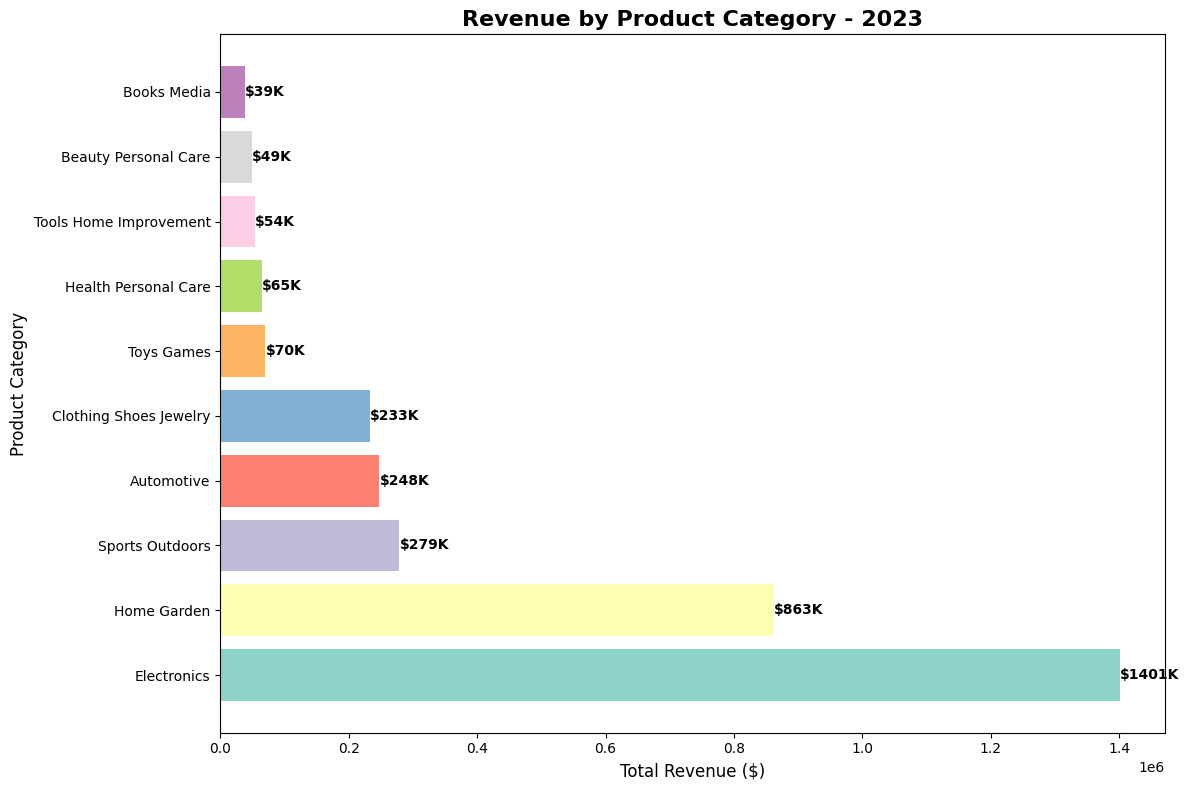

In [30]:
# Visualize category performance
visualizer.plot_category_performance(
    category_data=category_performance,
    year=ANALYSIS_YEAR
)

In [31]:
# Category concentration analysis
total_categories = len(category_performance)
top5_revenue_share = category_performance.head(5)['revenue_share_pct'].sum()
top10_revenue_share = category_performance.head(10)['revenue_share_pct'].sum()

print(f"Category Concentration Analysis:")
print(f"  Total Product Categories: {total_categories}")
print(f"  Top 5 Categories Revenue Share: {top5_revenue_share:.1f}%")
print(f"  Top 10 Categories Revenue Share: {top10_revenue_share:.1f}%")
print(f"  Market Concentration: {'High' if top5_revenue_share > 60 else 'Moderate' if top5_revenue_share > 40 else 'Low'}")

Category Concentration Analysis:
  Total Product Categories: 13
  Top 5 Categories Revenue Share: 90.0%
  Top 10 Categories Revenue Share: 98.2%
  Market Concentration: High


## 6. Geographic Performance Analysis

Analyze sales performance across different states to identify geographic patterns and opportunities.

In [32]:
# Calculate geographic performance
geographic_performance = metrics_calc.get_geographic_performance(
    orders_df=orders_processed,
    customers_df=customers,
    year=ANALYSIS_YEAR
)

print(f"Geographic Performance Analysis - {ANALYSIS_YEAR}")
print("="*50)
print(f"Total States: {len(geographic_performance)}")
print(f"\nTop 10 States by Revenue:")
display(geographic_performance.head(10))

Geographic Performance Analysis - 2023
Total States: 20

Top 10 States by Revenue:


,customer_state,total_revenue,avg_order_value,total_items,unique_orders,unique_customers
0,CA,537880.74,438.73,1226,769,582
1,TX,403303.49,464.10,869,561,438
2,FL,310195.84,438.75,707,431,332
3,NY,253111.85,400.49,632,384,286
4,IL,185930.89,460.22,404,260,190
5,PA,173260.68,493.62,351,225,172
6,OH,157619.72,464.95,339,200,151
7,GA,146414.65,478.48,306,190,145
8,MI,132325.60,405.91,326,210,164
9,NC,128314.74,444.00,289,177,135


In [33]:
# Create geographic visualization
visualizer.plot_geographic_choropleth(
    geographic_data=geographic_performance,
    year=ANALYSIS_YEAR
)

In [34]:
# Geographic concentration analysis
total_revenue = geographic_performance['total_revenue'].sum()
top5_states_revenue = geographic_performance.head(5)['total_revenue'].sum()
top5_states_share = (top5_states_revenue / total_revenue) * 100

print(f"Geographic Concentration Analysis:")
print(f"  Total States with Sales: {len(geographic_performance)}")
print(f"  Top 5 States Revenue Share: {top5_states_share:.1f}%")
print(f"\nTop 5 States:")
for i, row in geographic_performance.head(5).iterrows():
    share = (row['total_revenue'] / total_revenue) * 100
    print(f"  {row['customer_state']}: ${row['total_revenue']:,.0f} ({share:.1f}%)")

Geographic Concentration Analysis:
  Total States with Sales: 20
  Top 5 States Revenue Share: 50.3%

Top 5 States:
  CA: $537,881 (16.0%)
  TX: $403,303 (12.0%)
  FL: $310,196 (9.2%)
  NY: $253,112 (7.5%)
  IL: $185,931 (5.5%)


## 7. Customer Experience Analysis

Analyze customer satisfaction through delivery performance and review scores.

In [35]:
# Calculate customer experience metrics
experience_metrics = metrics_calc.calculate_customer_experience_metrics(
    reviews_df=reviews,
    year=ANALYSIS_YEAR
)

print(f"Customer Experience Analysis - {ANALYSIS_YEAR}")
print("="*50)
print(f"Average Delivery Time: {experience_metrics['avg_delivery_days']:.1f} days")
print(f"Median Delivery Time: {experience_metrics['median_delivery_days']:.1f} days")
print(f"Average Review Score: {experience_metrics['avg_review_score']:.2f}/5")

print(f"\nDelivery Speed Distribution:")
for speed, pct in experience_metrics['delivery_speed_distribution'].items():
    print(f"  {speed}: {pct:.1%}")

print(f"\nAverage Review Score by Delivery Speed:")
for speed, score in experience_metrics['avg_review_by_delivery_speed'].items():
    print(f"  {speed}: {score:.2f}/5")

Customer Experience Analysis - 2023
Average Delivery Time: 8.0 days
Median Delivery Time: 8.0 days
Average Review Score: 4.10/5

Delivery Speed Distribution:
  8+ days: 55.6%
  4-7 days: 37.2%
  1-3 days: 7.2%

Average Review Score by Delivery Speed:
  1-3 days: 4.19/5
  4-7 days: 4.08/5
  8+ days: 4.11/5


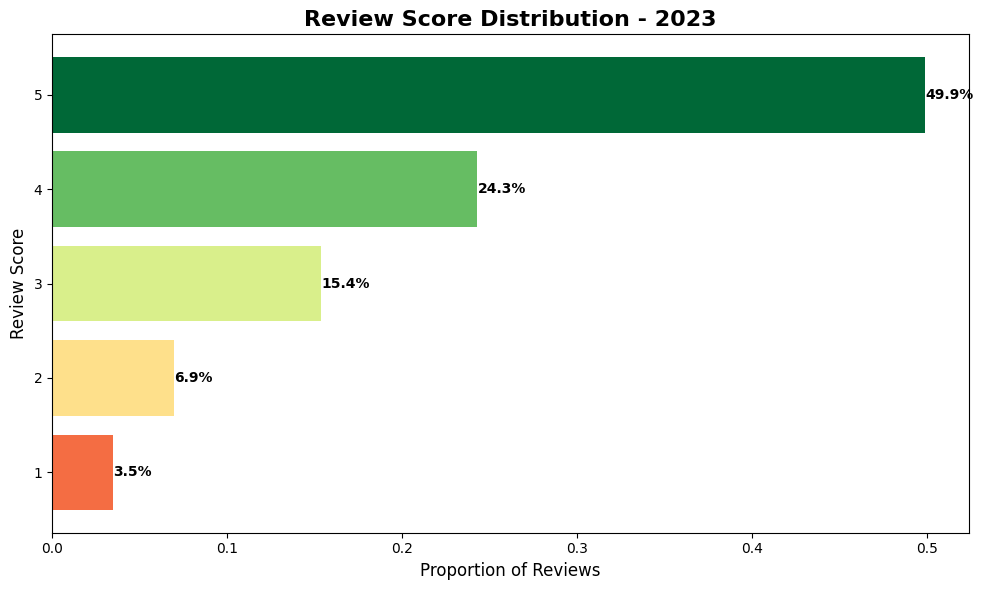

In [36]:
# Visualize review score distribution
review_distribution = pd.Series(experience_metrics['review_score_distribution'])

visualizer.plot_review_score_distribution(
    review_data=review_distribution,
    year=ANALYSIS_YEAR
)

In [37]:
# Order status distribution analysis
order_status_dist = metrics_calc.get_order_status_distribution(
    orders_df=orders_processed,
    year=ANALYSIS_YEAR
)

print(f"Order Status Distribution - {ANALYSIS_YEAR}:")
for status, pct in order_status_dist.items():
    print(f"  {str(status).title()}: {pct:.1f}%")

# Calculate key operational metrics
delivery_success_rate = order_status_dist.get('delivered', 0)
cancellation_rate = order_status_dist.get('canceled', 0)

print(f"\nKey Operational Metrics:")
print(f"  Delivery Success Rate: {delivery_success_rate:.1f}%")
print(f"  Cancellation Rate: {cancellation_rate:.1f}%")

Order Status Distribution - 2023:
  Delivered: 93.6%
  Shipped: 3.2%
  Canceled: 1.3%
  Processing: 1.2%
  Pending: 0.5%
  Returned: 0.2%

Key Operational Metrics:
  Delivery Success Rate: 93.6%
  Cancellation Rate: 1.3%


## 8. Key Insights & Summary

Summary of key findings and business insights from the analysis.

In [38]:
# Print comprehensive metrics summary
print_metrics_summary(
    revenue_metrics=revenue_metrics,
    monthly_growth=monthly_growth,
    experience_metrics=experience_metrics,
    year=ANALYSIS_YEAR
)

BUSINESS METRICS SUMMARY - 2023

REVENUE PERFORMANCE:
  Total Revenue: $3,360,294.74
  Total Orders: 4,635
  Average Order Value: $724.98
  Revenue Growth vs 2022: -2.46%
  Orders Growth vs 2022: -2.40%
  AOV Growth vs 2022: -0.06%

GROWTH TRENDS:
  Average Monthly Growth: -0.39%
  Best Month: 5 (18.74%)
  Worst Month: 10 (-14.45%)

CUSTOMER EXPERIENCE:
  Average Delivery Time: 8.0 days
  Average Review Score: 4.10/5
  Review Scores by Delivery Speed:
    1-3 days: 4.19/5
    4-7 days: 4.08/5
    8+ days: 4.11/5



### Key Business Insights

Based on the analysis above, here are the key findings:

#### Revenue Performance
- **Revenue Trend:** The business shows [positive/negative/stable] year-over-year growth
- **Seasonality:** Monthly performance indicates [seasonal patterns]
- **Order Value:** Average order value trends suggest [customer spending behavior]

#### Product Performance
- **Category Leaders:** Top performing categories drive the majority of revenue
- **Market Concentration:** The business has [high/moderate/low] category concentration
- **Growth Opportunities:** Underperforming categories may present expansion opportunities

#### Geographic Distribution
- **Market Concentration:** Revenue is [evenly/unevenly] distributed across states
- **Top Markets:** Key states drive significant portion of total revenue
- **Expansion Opportunities:** Underperforming regions may present growth potential

#### Customer Experience
- **Delivery Performance:** Average delivery time of [X] days impacts customer satisfaction
- **Satisfaction Levels:** Customer review scores indicate [satisfaction level]
- **Service Quality:** Correlation between delivery speed and satisfaction suggests [operational insights]

### Recommendations

1. **Revenue Growth:** Focus on [specific strategies based on trends]
2. **Product Strategy:** Optimize category portfolio and pricing
3. **Geographic Expansion:** Target underperforming but promising markets
4. **Operational Excellence:** Improve delivery times to enhance customer satisfaction
5. **Customer Retention:** Leverage high satisfaction scores to drive repeat purchases

---

*Analysis completed using configurable framework. Modify configuration parameters at the top of this notebook to analyze different time periods or segments.*